In [12]:
# Load all the images
import os
import glob
import PIL
import scipy.misc
from pathlib import Path
import numpy as np
import cv2
from PIL import Image
path=os.getcwd()
folder=path+"\\orl_faces\\"
images=[]
width,height=28,28
for i in range(1,41):
    val="s"+str(i)
    final_path=folder+val
    temp=[]
    for f in Path(final_path).glob('*.pgm'):
        img=scipy.misc.imread(f)
        img_resize=scipy.misc.imresize(img, [28,28])
        temp.append(img_resize)
    images.append(np.asarray(temp))

C:\Users\sananand\AppData\Local\Continuum\miniconda3\envs\tensorflowpy36\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
C:\Users\sananand\AppData\Local\Continuum\miniconda3\envs\tensorflowpy36\lib\site-packages\ipykernel_launcher.py:20: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


In [13]:
## Veerify once the images are extracted
import cv2
from PIL import Image
print(len(images))
for i in range(0,7):
    print("Image shape of some of the images", images[0][i].shape)
    #newimage=np.reshape(images[0][i],(images[0][i].shape[0], images[0][i].shape[1], 1))
    img=Image.fromarray(images[0][i])
    name="test_image"+str(i)+".png"
    img.save(name)

40
Image shape of some of the images (28, 28)
Image shape of some of the images (28, 28)
Image shape of some of the images (28, 28)
Image shape of some of the images (28, 28)
Image shape of some of the images (28, 28)
Image shape of some of the images (28, 28)
Image shape of some of the images (28, 28)


In [14]:
def train_test_split(Images):
    train=[]
    test=[]
    #print(len(Images[39]))
    for i in range(40):
        temp_train=[Images[i][j] for j in range(6)]
        temp_test=[Images[i][j] for j in range(6,10)]
        train.append(np.asarray(temp_train))
        test.append(np.asarray(temp_test))
    return np.asarray(train), np.asarray(test)

X_train, X_test = train_test_split(images)
print(X_train.shape)
print(X_test.shape)

(40, 6, 28, 28)
(40, 4, 28, 28)


In [15]:
# One hot encode the labels as well for the train and test
def labels():
    train_lab, test_lab = [],[]
    for i in range(40): #i is the subject so based on that you will one hot encode
        temp_=[0]*40
        temp_[i]=1
        temp_tr,temp_tst=[],[]
        for j in range(10):
            if j<=5:
                temp_tr.append(temp_)
            else: 
                temp_tst.append(temp_)
        train_lab.append(temp_tr)
        test_lab.append(temp_tst)
    return np.asarray(train_lab), np.asarray(test_lab)

y_train, y_test = labels()

In [16]:
print("Training labels shape: {}, test labels shape: {}".format(y_train.shape, y_test.shape))

Training labels shape: (40, 6, 40), test labels shape: (40, 4, 40)


Check the dimensions of the image

(512, 512)
Check the dimensions of the LBP

(512, 512)


C:\Users\sananand\AppData\Local\Continuum\miniconda3\envs\tensorflowpy36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Rotated images matched against references using LBP:
original: brick, rotated: 30deg, match result:  brick
original: brick, rotated: 70deg, match result:  brick
original: grass, rotated: 145deg, match result:  grass


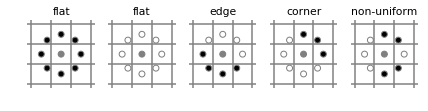

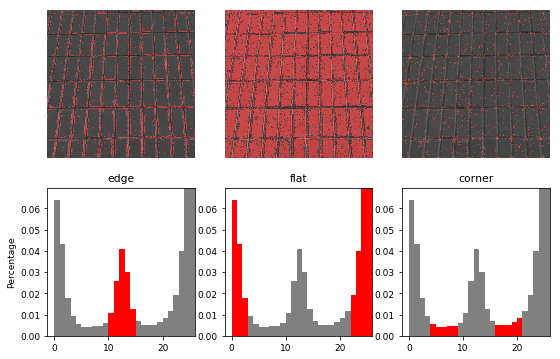

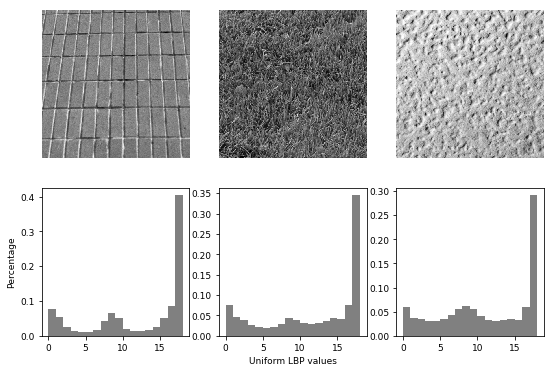

In [17]:
"""
===============================================
Local Binary Pattern for texture classification
===============================================

In this example, we will see how to classify textures based on LBP (Local
Binary Pattern). LBP looks at points surrounding a central point and tests
whether the surrounding points are greater than or less than the central point
(i.e. gives a binary result).

Before trying out LBP on an image, it helps to look at a schematic of LBPs.
The below code is just used to plot the schematic.
"""
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt


METHOD = 'uniform'
plt.rcParams['font.size'] = 9


def plot_circle(ax, center, radius, color):
    circle = plt.Circle(center, radius, facecolor=color, edgecolor='0.5')
    ax.add_patch(circle)


def plot_lbp_model(ax, binary_values):
    """Draw the schematic for a local binary pattern."""
    # Geometry spec
    theta = np.deg2rad(45)
    R = 1
    r = 0.15
    w = 1.5
    gray = '0.5'

    # Draw the central pixel.
    plot_circle(ax, (0, 0), radius=r, color=gray)
    # Draw the surrounding pixels.
    for i, facecolor in enumerate(binary_values):
        x = R * np.cos(i * theta)
        y = R * np.sin(i * theta)
        plot_circle(ax, (x, y), radius=r, color=str(facecolor))

    # Draw the pixel grid.
    for x in np.linspace(-w, w, 4):
        ax.axvline(x, color=gray)
        ax.axhline(x, color=gray)

    # Tweak the layout.
    ax.axis('image')
    ax.axis('off')
    size = w + 0.2
    ax.set_xlim(-size, size)
    ax.set_ylim(-size, size)


fig, axes = plt.subplots(ncols=5, figsize=(7, 2))

titles = ['flat', 'flat', 'edge', 'corner', 'non-uniform']

binary_patterns = [np.zeros(8),
                   np.ones(8),
                   np.hstack([np.ones(4), np.zeros(4)]),
                   np.hstack([np.zeros(3), np.ones(5)]),
                   [1, 0, 0, 1, 1, 1, 0, 0]]

for ax, values, name in zip(axes, binary_patterns, titles):
    plot_lbp_model(ax, values)
    ax.set_title(name)

######################################################################
# The figure above shows example results with black (or white) representing
# pixels that are less (or more) intense than the central pixel. When
# surrounding pixels are all black or all white, then that image region is
# flat (i.e. featureless). Groups of continuous black or white pixels are
# considered "uniform" patterns that can be interpreted as corners or edges.
# If pixels switch back-and-forth between black and white pixels, the pattern
# is considered "non-uniform".
#
# When using LBP to detect texture, you measure a collection of LBPs over an
# image patch and look at the distribution of these LBPs. Lets apply LBP to a
# brick texture.

from skimage.transform import rotate
from skimage.feature import local_binary_pattern
from skimage import data
from skimage.color import label2rgb

# settings for LBP
radius = 3
n_points = 8 * radius


def overlay_labels(image, lbp, labels):
    mask = np.logical_or.reduce([lbp == each for each in labels])
    return label2rgb(mask, image=image, bg_label=0, alpha=0.5)


def highlight_bars(bars, indexes):
    for i in indexes:
        bars[i].set_facecolor('r')


image = data.load('brick.png')
lbp = local_binary_pattern(image, n_points, radius, METHOD)

print("Check the dimensions of the image\n")
print(image.shape)
print("Check the dimensions of the LBP\n")
print(lbp.shape)


def hist(ax, lbp):
    n_bins = int(lbp.max() + 1)
    return ax.hist(lbp.ravel(), normed=True, bins=n_bins, range=(0, n_bins),
                   facecolor='0.5')


# plot histograms of LBP of textures
fig, (ax_img, ax_hist) = plt.subplots(nrows=2, ncols=3, figsize=(9, 6))
plt.gray()

titles = ('edge', 'flat', 'corner')
w = width = radius - 1
edge_labels = range(n_points // 2 - w, n_points // 2 + w + 1)
flat_labels = list(range(0, w + 1)) + list(range(n_points - w, n_points + 2))
i_14 = n_points // 4            # 1/4th of the histogram
i_34 = 3 * (n_points // 4)      # 3/4th of the histogram
corner_labels = (list(range(i_14 - w, i_14 + w + 1)) +
                 list(range(i_34 - w, i_34 + w + 1)))

label_sets = (edge_labels, flat_labels, corner_labels)

for ax, labels in zip(ax_img, label_sets):
    ax.imshow(overlay_labels(image, lbp, labels))

for ax, labels, name in zip(ax_hist, label_sets, titles):
    counts, _, bars = hist(ax, lbp)
    highlight_bars(bars, labels)
    ax.set_ylim(ymax=np.max(counts[:-1]))
    ax.set_xlim(xmax=n_points + 2)
    ax.set_title(name)

ax_hist[0].set_ylabel('Percentage')
for ax in ax_img:
    ax.axis('off')


######################################################################
# The above plot highlights flat, edge-like, and corner-like regions of the
# image.
#
# The histogram of the LBP result is a good measure to classify textures.
# Here, we test the histogram distributions against each other using the
# Kullback-Leibler-Divergence.

# settings for LBP
radius = 2
n_points = 8 * radius


def kullback_leibler_divergence(p, q):
    p = np.asarray(p)
    q = np.asarray(q)
    filt = np.logical_and(p != 0, q != 0)
    return np.sum(p[filt] * np.log2(p[filt] / q[filt]))


def match(refs, img):
    best_score = 10
    best_name = None
    lbp = local_binary_pattern(img, n_points, radius, METHOD)
    n_bins = int(lbp.max() + 1)
    hist, _ = np.histogram(lbp, normed=True, bins=n_bins, range=(0, n_bins))
    for name, ref in refs.items():
        ref_hist, _ = np.histogram(ref, normed=True, bins=n_bins,
                                   range=(0, n_bins))
        score = kullback_leibler_divergence(hist, ref_hist)
        if score < best_score:
            best_score = score
            best_name = name
    return best_name


brick = data.load('brick.png')
grass = data.load('grass.png')
wall = data.load('rough-wall.png')

refs = {
    'brick': local_binary_pattern(brick, n_points, radius, METHOD),
    'grass': local_binary_pattern(grass, n_points, radius, METHOD),
    'wall': local_binary_pattern(wall, n_points, radius, METHOD)
}

# classify rotated textures
print('Rotated images matched against references using LBP:')
print('original: brick, rotated: 30deg, match result: ',
      match(refs, rotate(brick, angle=30, resize=False)))
print('original: brick, rotated: 70deg, match result: ',
      match(refs, rotate(brick, angle=70, resize=False)))
print('original: grass, rotated: 145deg, match result: ',
      match(refs, rotate(grass, angle=145, resize=False)))

# plot histograms of LBP of textures
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3,
                                                       figsize=(9, 6))
plt.gray()

ax1.imshow(brick)
ax1.axis('off')
hist(ax4, refs['brick'])
ax4.set_ylabel('Percentage')

ax2.imshow(grass)
ax2.axis('off')
hist(ax5, refs['grass'])
ax5.set_xlabel('Uniform LBP values')

ax3.imshow(wall)
ax3.axis('off')
hist(ax6, refs['wall'])

plt.show()

In [18]:
def get_lbp(X_train, X_test):
    #do something
    # settings for LBP
    radius = 2
    n_points = 8 * radius
    METHOD = 'uniform'
    subjects, num_images_train, img_ht, img_wid = X_train.shape
    num_images_test=X_test.shape[1]
    X_train_new,X_test_new=[],[]
    
    #Train images for LBP
    for i in range(subjects):
        temp=[]
        for j in range(num_images_train):
            img=X_train[i][j]
            lbp=local_binary_pattern(img, n_points, radius, METHOD)
            temp.append(lbp)
        X_train_new.append(np.asarray(temp))
    
    #Test images for LBP
    for i in range(subjects):
        temp=[]
        for j in range(num_images_test):
            img=X_test[i][j]
            lbp=local_binary_pattern(img, n_points, radius, METHOD)
            temp.append(lbp)
        X_test_new.append(np.asarray(temp))
    return np.asarray(X_train_new), np.asarray(X_test_new)

X_train_transf, X_test_transf = get_lbp(X_train, X_test)
print("New Training set with feauture {}, New Test set with feature {}".format(X_train_transf.shape, X_test_transf.shape))

New Training set with feauture (40, 6, 28, 28), New Test set with feature (40, 4, 28, 28)


In [20]:
## Using the Softmax Classifier with Tensorflow
import tensorflow as tf
print("TensorFlow version " + tf.__version__)
tf.set_random_seed(0)

# Reshaping the Training set and test set to use with TF
reshaped_train_set = np.reshape(X_train_transf, (240, X_train_transf.shape[2], X_train_transf.shape[3]))
reshaped_train_set = reshaped_train_set.reshape(-1, 784)
reshaped_test_set = np.reshape(X_test_transf, (160, X_test_transf.shape[2], X_test_transf.shape[3]))
reshaped_test_set = reshaped_test_set.reshape(-1, 784)
print("Reshaped Train set shape {}, Reshaped Test set shape {}".format(reshaped_train_set.shape, reshaped_test_set.shape))

# Reshaping the Labels
reshaped_train_labels  = np.reshape(y_train, (240, y_train.shape[-1]))
reshaped_test_labels   = np.reshape(y_test, (160, y_test.shape[-1]))
print("Reshaped Train labels shape {}, Reshaped Test labels shape {}".format(reshaped_train_labels.shape, reshaped_test_labels.shape))

# Normalize the feature data before training
maximum_tr=max(reshaped_train_set[0])
reshaped_train_set_norm = reshaped_train_set/(1.0*maximum_tr)
maximum_test=max(reshaped_test_set[0])
reshaped_test_set_norm = reshaped_test_set/(1.0*maximum_test)

TensorFlow version 1.2.1
Reshaped Train set shape (240, 784), Reshaped Test set shape (160, 784)
Reshaped Train labels shape (240, 40), Reshaped Test labels shape (160, 40)


In [29]:
'''Trains and evaluates a fully-connected neural net classifier'''
import time
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
## Using the Softmax Classifier with Tensorflow
import tensorflow as tf
print("TensorFlow version " + tf.__version__)
tf.set_random_seed(0)
beginTime = time.time()

# Parameter definitions
batch_size = 10
learning_rate = 0.0003
hidden_units=120
max_steps = 2000

# Define input placeholders for images and labels
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 40])

## TODO : Just plain 2 L FNN only

'''
Wieght Initialization
'''
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)


'''
Convolution and Pooling
'''
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1,1,1,1], padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

TensorFlow version 1.2.1


In [30]:
# size = [filter_size, filter_size, input_channel, number_of_output_channels]
W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

x_image = tf.reshape(x, [-1, 28, 28, 1])

h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

W_fc2 = weight_variable([1024, 40])
b_fc2 = bias_variable([40])

y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

In [31]:
# Train
import time
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

beginTime = time.time()

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_conv))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
confusion_matrix = tf.confusion_matrix(tf.argmax(y_,1), tf.argmax(y_conv,1))

max_steps = 1000
batch_size=10

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    # Repeat max_steps times
    for i in range(max_steps):
        # Generate input data batch
        indices = np.random.choice(reshaped_train_set_norm.shape[0], batch_size)
        images_batch = reshaped_train_set_norm[indices]
        labels_batch = reshaped_train_labels[indices]

        # Periodically print out the model's current accuracy
        if i % 100 == 0:
            train_accuracy = accuracy.eval(feed_dict={x: images_batch, y_: labels_batch, keep_prob: 1.0})
            #train_accuracy = sess.run(accuracy, feed_dict={images_placeholder: images_batch, labels_placeholder: labels_batch})
            print('Step {:5d}: training accuracy {:g}'.format(i, train_accuracy))

        # Perform a single training step
        sess.run(train_step, feed_dict={x: images_batch,y_: labels_batch, keep_prob: 0.5})
    # After finishing the training, evaluate on the test set
    test_accuracy, conf_mat = sess.run([accuracy, confusion_matrix], feed_dict={x: reshaped_test_set_norm,y_: reshaped_test_labels, keep_prob: 1.0})
    print('Test accuracy {:g}'.format(test_accuracy))
    print('Confusion Matrix',conf_mat)
endTime = time.time()
print('Total time: {:5.2f}s'.format(endTime - beginTime))

Step     0: training accuracy 0
Step   100: training accuracy 0.1
Step   200: training accuracy 0.7
Step   300: training accuracy 1
Step   400: training accuracy 1
Step   500: training accuracy 1
Step   600: training accuracy 1
Step   700: training accuracy 1
Step   800: training accuracy 1
Step   900: training accuracy 1
Test accuracy 0.66875
Confusion Matrix [[2 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 4 ... 0 0 0]
 ...
 [0 0 0 ... 4 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 1 ... 0 0 0]]
Total time: 77.04s


In [32]:
# Making sense of the confusion matrix
for idx,c in enumerate(conf_mat[:]):
    if idx!=np.argmax(c, 0):
        print("Wrong Prediction for class : {}".format(idx))

Wrong Prediction for class : 13
Wrong Prediction for class : 15
Wrong Prediction for class : 26
Wrong Prediction for class : 30
Wrong Prediction for class : 34
Wrong Prediction for class : 38
Wrong Prediction for class : 39


### Results for LBP and use of FNN 

+ One of the Output runs are pretty good as you see below, caught one of the good runs !!
```
Step     0: training accuracy 0
Step   100: training accuracy 0.1
Step   200: training accuracy 0.7
Step   300: training accuracy 1
Step   400: training accuracy 1
Step   500: training accuracy 1
Step   600: training accuracy 1
Step   700: training accuracy 1
Step   800: training accuracy 1
Step   900: training accuracy 1
Test accuracy 0.66875
Confusion Matrix [[2 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 4 ... 0 0 0]
 ...
 [0 0 0 ... 4 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 1 ... 0 0 0]]
Total time: 77.04s
```
+ Training accuracy reaches 100%
+ Test accuracy reaches almost 67%, which is better than using LBP with Softmax classifier 
+ Images have been scaled down to fit the NN, remember changing the sizes does affect the performance
+ Dataset is extremely small so not much data to work with, data-augmentation will help a lot here, will try that later
+ Changing the size of the Inputs can be tried to have better peroformance